# Reddit Climate Change - Data Understanding
Supervision: Prof. Dr. Jan Fabian Ehmke

Group members: Britz Luis, Huber Anja, Krause Felix Elias, Preda Yvonne-Nadine

Time: Summer term 2023 

Data: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

## Project Understanding
- What is the problem to be solved, what the expected benefit?
- How would a solution look like?
- Research question / project goal --> will be set after first data investigation and group discussion
- Legal limitations? Privacy limitations?

</br>

- How does Reddit work? What is a subcomment and a subreddit? Who is giving the name to a subreddit; the author of the subreddit?
- Does the score come from the reddit platform? What is it? F: Number of upvotes - downvotes
- Are there @ mentions in reddit posts?

### Information from Kaggle
- all the posts and comments on Reddit mentioning the terms "climate" and "change"
- the data does not include usernames.

Ideas:
- categorize positive and negative attitude reddits to intervene in case its a polarizing trend (but we already have the sentiment score); I did a similar thing in a previous project for tweets 
- Is this a logical AND for the two topic nouns? 


In [ ]:
# Preparing the environment
%pip install pandas
%pip install wordcloud
%pip install nltk
%pip install scikit-learn

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing data
raw_comments = pd.read_csv('data/the-reddit-climate-change-dataset-comments.csv', nrows=1000) # FIXME Sample for start!
raw_posts = pd.read_csv('data/the-reddit-climate-change-dataset-posts.csv', nrows=1000)

In [14]:
idx = 10
print(raw_comments.loc[idx])
print(raw_comments.loc[idx, "body"])

type                                                        comment
id                                                          imlch0h
subreddit.id                                                  2qh1i
subreddit.name                                            askreddit
subreddit.nsfw                                                False
created_utc                                              1661989961
permalink         https://old.reddit.com/r/AskReddit/comments/x2...
body              That a big part of the solution to climate cha...
sentiment                                                    0.8937
score                                                             2
Name: 10, dtype: object
That a big part of the solution to climate change is population control. The world is already way beyond its carrying capacity.

I'm not talking about killing people of preventing them from having babies. I'm talking about free universal reproductive education and access to birth control. Also r

## Data Unterstanding
- What data is available?
- Is the data relevant to the problem?
- Is the data valid? Does it reflect expectations?
- Is data quality, quantity, recency sufficient?
- What do we need to take care of in data preparation?

### Comments Dataset

In [18]:
# Checking 'comments' dataset structure
raw_comments

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1
...,...,...,...,...,...,...,...,...,...,...
995,comment,imjkvrm,2yuqy,trueoffmychest,False,1661964929,https://old.reddit.com/r/TrueOffMyChest/commen...,You know nothing of being wrecked. Relationshi...,-0.4371,2
996,comment,imjkvn3,2qh1n,environment,False,1661964928,https://old.reddit.com/r/environment/comments/...,The fact that people have to own cars is surel...,-0.5719,9
997,comment,imjkv2f,3vl7ap,uraniumsqueeze,False,1661964921,https://old.reddit.com/r/UraniumSqueeze/commen...,"As per some Swedish friends of mine.\n\n""If th...",0.9776,18
998,comment,imjku1z,2qh1i,askreddit,False,1661964910,https://old.reddit.com/r/AskReddit/comments/x2...,This feels like that time Trump brought in a s...,0.3612,4


In [36]:
# Checking datatypes of 'comments' dataset
raw_comments.dtypes

type                              object
id                                object
subreddit.id                      object
subreddit.name                    object
subreddit.nsfw                      bool
created_utc                        int64
permalink                         object
body                              object
sentiment                        float64
score                              int64
converted_created    datetime64[ns, UTC]
created_converted    datetime64[ns, UTC]
created_date                      object
dtype: object

In [17]:
# Checking data ranges of 'comments' dataset
raw_comments.describe()

,created_utc,sentiment,score
count,1.000000e+03,978.000000,1000.000000
mean,1.661977e+09,-0.014850,9.598000
std,7.182209e+03,0.641392,53.784879
min,1.661965e+09,-0.999700,-64.000000
25%,1.661971e+09,-0.624650,1.000000
50%,1.661977e+09,0.000000,2.000000
75%,1.661983e+09,0.542300,5.000000
max,1.661990e+09,0.999100,1255.000000


In [49]:
# Convert comments timestamps and create a date column
raw_comments['created_converted'] = pd.to_datetime(raw_comments['created_utc'], utc=True, unit='s')
raw_comments['created_date'] = pd.to_datetime(raw_comments['created_converted']).dt.normalize() # gets rid of the timestamp inside the date

In [59]:
# Latest collected comment
print("The latest collected comment about 'climate change' is from ") 
max(raw_comments['created_converted'])

The latest collected comment about 'climate change' is from 


Timestamp('2022-08-31 23:59:28+0000', tz='UTC')

In [60]:
# Earliest collected comment
print("And the earliest is from ") 
min(raw_comments['created_converted'])

And the earliest is from 


Timestamp('2010-01-01 00:34:07+0000', tz='UTC')

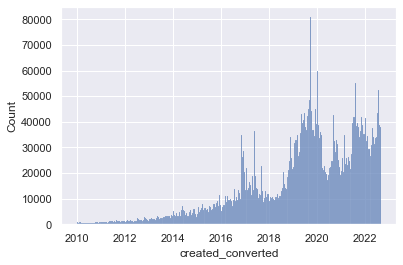

In [52]:
# Distribution of datapoints
sns.set(style="darkgrid")
sns.histplot(data=raw_comments, x="created_converted")
plt.show()

#### Learnings from Comments Dataset
- There is already a sentiment score, how is it created and what does it mean? what is the scale?
- The data is not equally distributed, there is way less data from the beginning of the tracking and more recent data, also there is a huge peak in the data, probably interesting to be explored

### Posts Dataset

In [19]:
# Checking 'posts' dataset structure
raw_posts

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,post,wyzn9l,2qh1i,askreddit,False,1661596504,https://old.reddit.com/r/AskReddit/comments/wy...,self.askreddit,NaN,[deleted],What countries do you think will probably not ...,0
996,post,wyzjbm,2qvsh,eunews,False,1661596121,https://old.reddit.com/r/EUnews/comments/wyzjb...,ft.com,https://www.ft.com/content/1178e966-db8b-45bd-...,NaN,Harvest comes early as French winemakers grapp...,1
997,post,wyziab,2suxs,commercialfishing,False,1661596022,https://old.reddit.com/r/commercialfishing/com...,washingtonpost.com,https://www.washingtonpost.com/business/2022/0...,NaN,Alaska’s snow crabs have disappeared. Where th...,7
998,post,wyy2mt,57k58i,insuretech,False,1661590811,https://old.reddit.com/r/insuretech/comments/w...,self.insuretech,NaN,Munich Re has a “strong appetite for nat cat” ...,Munich Re will adjust to climate change to sup...,1


In [35]:
# Checking datatypes of 'posts' dataset
raw_posts.dtypes

type                              object
id                                object
subreddit.id                      object
subreddit.name                    object
subreddit.nsfw                      bool
created_utc                        int64
permalink                         object
domain                            object
url                               object
selftext                          object
title                             object
score                              int64
created_converted    datetime64[ns, UTC]
dtype: object

In [16]:
# Checking data ranges of 'posts' dataset
raw_posts.describe()

,created_utc,score
count,1.000000e+03,1000.000000
mean,1.661788e+09,160.701000
std,1.155006e+05,3373.392109
min,1.661589e+09,0.000000
25%,1.661683e+09,1.000000
50%,1.661804e+09,1.000000
75%,1.661880e+09,2.000000
max,1.661990e+09,104965.000000


In [50]:
# Convert post timestamps and create a date column
raw_posts['created_converted'] = pd.to_datetime(raw_posts['created_utc'], utc=True, unit='s')
raw_posts['created_date'] = pd.to_datetime(raw_posts['created_converted']).dt.normalize() # gets rid of the timestamp inside the date

In [57]:
# Latest collected post
print("The latest collected post about 'climate change' is from ") 
max(raw_posts['created_converted'])

The latest collected post about 'climate change' is from 


Timestamp('2022-08-31 23:59:28+0000', tz='UTC')

In [58]:
# Earliest collected post
print("And the earliest is from ") 
min(raw_posts['created_converted'])

And the earliest is from 


Timestamp('2010-01-01 00:12:30+0000', tz='UTC')

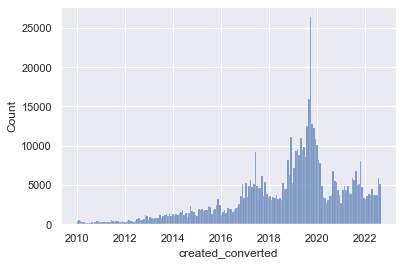

In [51]:
# Distribution of datapoints
sns.set(style="darkgrid")
sns.histplot(data=raw_posts, x="created_converted")
plt.show()

In [70]:
# Post types
distinct_post_types = raw_posts["type"].unique()
print("The posts dataset has only entries of type = 'post'. There is no other type of posts in reddit")

The posts dataset has only entries of type = 'post'. There is no other type of posts in reddit


In [75]:
# Domain types
distinct_domains = raw_posts["domain"].unique()
print("There are ")
print(len(distinct_domains))
print("different domains in the post dataset")

There is 
28707
different domains in the post dataset


In [78]:
print(raw_posts["selftext"].head())

0                                                  NaN
1    Ok so I was having a conversation with my neig...
2                                                  NaN
3                                                  NaN
4                                            [deleted]
Name: selftext, dtype: object


### Merging of both dataframes